#  The Singular Value Decomposition 

In [1]:
% eigsvdgui # demo showing how various Eigenvalue routines eliminate off-diagonal entries

In [2]:
% imagesvd  # demo showing how the rank-k approximation work  (works only in Matlab)

## Unitary Matrices

A (possibly complex) square matrix $U$ is <b>unitary</b> if
$U' \, U ~=~ U \, U' ~=~ I$.

<ul><li>
every orthogonal matrix $Q$ is unitary:  $Q'\,Q ~=~ I$.
</li><li>
a <b>complex unit value</b> (a value like $z = e^{i\theta}$) is unitary:  $\overline{z}\,z ~=~ 1$.
</li><li>every diagonal matrix $D$ of complex unit values is unitary:
$D' \, D ~=~ 1$.
</li><li>
If $U$ is unitary, then the eigenvalues of $U$ are complex unit values.
</li><li>
Unitary matrices preserve the length of any vector they transform:
if $U$ is unitary, and ${\bf v}$ is a vector,
 then $\mid\mid{U\,{\bf v}}\mid\mid = \mid\mid{\bf v}\mid\mid$.
</li></ul>


In [3]:
%  All orthogonal matrices are unitary

%  random orthogonal matrix

Q = gallery("orthog", 4)

Q' * Q

Q =

   0.37175   0.60150   0.60150   0.37175
   0.60150   0.37175  -0.37175  -0.60150
   0.60150  -0.37175  -0.37175   0.60150
   0.37175  -0.60150   0.60150  -0.37175

ans =

   1.00000  -0.00000   0.00000   0.00000
  -0.00000   1.00000   0.00000  -0.00000
   0.00000   0.00000   1.00000   0.00000
   0.00000  -0.00000   0.00000   1.00000



### Nice Example of a Unitary Matrix:  The Fourier Matrix

In [4]:
FourierMatrix  =  @(n) 1/sqrt(n) * fft(eye(n));

F2 = FourierMatrix(2)

F2 =

   0.70711   0.70711
   0.70711  -0.70711



In [5]:
F2 * F2'
det(F2)

ans =

   1.00000   0.00000
   0.00000   1.00000

ans = -1.00000


In [6]:
F4 = FourierMatrix(4)

F4 =

 Columns 1 through 3:

   0.50000 + 0.00000i   0.50000 + 0.00000i   0.50000 + 0.00000i
   0.50000 + 0.00000i   0.00000 - 0.50000i  -0.50000 + 0.00000i
   0.50000 + 0.00000i  -0.50000 + 0.00000i   0.50000 + 0.00000i
   0.50000 - 0.00000i   0.00000 + 0.50000i  -0.50000 - 0.00000i

 Column 4:

   0.50000 + 0.00000i
   0.00000 + 0.50000i
  -0.50000 + 0.00000i
   0.00000 - 0.50000i



In [7]:
F4 * F4'

ans =

   1   0   0   0
   0   1   0   0
   0   0   1   0
   0   0   0   1



In [8]:
det(F4)

ans =  0 + 1i


## The SVD

In [9]:
A = rand(3,3)
[U,S,V] = svd(A)

A =

   0.838993   0.461125   0.392736
   0.036211   0.240850   0.670676
   0.077928   0.161682   0.936185

U =

  -0.611913   0.790430   0.027998
  -0.478099  -0.341458  -0.809215
  -0.630067  -0.508555   0.586846

S =

Diagonal Matrix

   1.381943          0          0
          0   0.754526          0
          0          0   0.097434

V =

  -0.41956   0.81001   0.40971
  -0.36122   0.26510  -0.89400
  -0.83276  -0.52308   0.18137



In [10]:
U * S * V'
A
error = norm( A - U * S * V' )

ans =

   0.838993   0.461125   0.392736
   0.036211   0.240850   0.670676
   0.077928   0.161682   0.936185

A =

   0.838993   0.461125   0.392736
   0.036211   0.240850   0.670676
   0.077928   0.161682   0.936185

error =    6.7002e-16


### Every matrix has an SVD -- even rectangular matrices

In [11]:
A = rand(4,3)
[U,S,V] = svd(A)

A =

   0.796714   0.856384   0.077361
   0.683926   0.477364   0.273891
   0.737613   0.193704   0.203371
   0.979902   0.247950   0.318896

U =

  -0.583618  -0.728560  -0.345078   0.097527
  -0.458899  -0.067737   0.864762  -0.192378
  -0.401305   0.386539  -0.350182  -0.752937
  -0.536429   0.561426  -0.102372   0.621743

S =

Diagonal Matrix

   1.89871         0         0
         0   0.52190         0
         0         0   0.11684
         0         0         0

V =

  -0.84293   0.39946  -0.36041
  -0.48960  -0.84726   0.20604
  -0.22306   0.35013   0.90976



In [12]:
U * S * V'
A
error = norm( A - U * S * V' )

ans =

   0.796714   0.856384   0.077361
   0.683926   0.477364   0.273891
   0.737613   0.193704   0.203371
   0.979902   0.247950   0.318896

A =

   0.796714   0.856384   0.077361
   0.683926   0.477364   0.273891
   0.737613   0.193704   0.203371
   0.979902   0.247950   0.318896

error =    3.2342e-16


## The "Economy" SVD  -- doesn't bother with zero singular values; S is always a square matrix

In [13]:
[U,S,V] = svd(A, 'econ')

U =

  -0.583618  -0.728560  -0.345078
  -0.458899  -0.067737   0.864762
  -0.401305   0.386539  -0.350182
  -0.536429   0.561426  -0.102372

S =

Diagonal Matrix

   1.89871         0         0
         0   0.52190         0
         0         0   0.11684

V =

  -0.84293   0.39946  -0.36041
  -0.48960  -0.84726   0.20604
  -0.22306   0.35013   0.90976



## The Rank-$k$ Approximation of a Matrix, using the SVD

If $A \,=\, U\,S\,V'$, the <b>rank-k approximation</b>
of $A$ is
\[
A^{(k)} ~~=~~ U ~ S^{(k)} ~ \adjoint{V}
\]
where all columns {\bf after $k$} of $U^{(k)}$, $S^{(k)}$, and $V^{(k)}$ are zero:
$${\small
A^{(k)} ~~=~~
\begin{pmatrix}
 & & & & \\
 & & & & \\
{\bf u}_1 & \cdots & {\bf u}_k & {\bf 0} & \cdots  & {\bf 0} \\
 & & & & \\
 & & & &
\end{pmatrix}
~~
\begin{pmatrix}
\sigma_1 &        &          &  &  & \\
         & \ddots &          &  &  & \\
         &        & \sigma_k &  &  & \\
         &        &          & 0 &  & \\
         &        &          &  &  \ddots & \\
         &        &          &  &  & 0 \\
         &        &          &  &  & \\
         &        &          &  &  & \\
\end{pmatrix}
~~
\begin{pmatrix}
 & & & & \\
 & & & & \\
{\bf v}_1 & \cdots  & {\bf v}_k & {\bf 0} & \cdots  & {\bf 0} \\
 & & & & \\
 & & & &
\end{pmatrix} '
}$$

In [14]:
[U2, S2, V2] = svds(A, 2)  %  compute only the first 2 columns of A's SVD

U2 =

  -0.583618  -0.728560
  -0.458899  -0.067737
  -0.401305   0.386539
  -0.536429   0.561426

S2 =

Diagonal Matrix

   1.89871         0
         0   0.52190

V2 =

  -0.84293   0.39946
  -0.48960  -0.84726
  -0.22306   0.35013



In [15]:
error = norm( A - U2 * S2 * V2' )  %  approximation error! (omitted 3rd column)

error =  0.11684


## The Rank-$k$ Approximation is a Good Approximation

$$\begin{eqnarray*}
A \; - \; A^{(k)}
 & = &
U \; S \; V' ~ - ~ U^{(k)} ~ S^{(k)} ~ V^{(k)'}  \\
 & = &
U \; S \; V' ~ - ~ U \; S^{(k)} \; V' \\
 & = &
U \; (S ~ - ~ S^{(k)}) \; V ' \\
\\
\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} & = & \sum_{i>k} \sigma_i^2 .
\end{eqnarray*}$$

In [16]:
[U, S, V] = svd(A);

[U2, S2, V2] = svds(A, 2);

A2 = U2 * S2 * V2'     % rank-2 approximation of A

S

A2 =

   0.78218   0.86469   0.11404
   0.72034   0.45655   0.18197
   0.72287   0.20213   0.24059
   0.97559   0.25041   0.32978

S =

Diagonal Matrix

   1.89871         0         0
         0   0.52190         0
         0         0   0.11684
         0         0         0



In [17]:
norm( A - A2, 'fro' )^2  % squared Frobenius norm

sum( diag(S).^2 ) - sum( diag(S2).^2 )

ans =  0.013651
ans =  0.013651


## Latent Semantic Indexing

Demo of Latent Semantic Indexing
for a co-occurrence matrix of X terms vs. Y terms
(in this case, Keywords vs. Books).

Components are computed as in:
  Berry, M. W., Dumais, S. T., and O'Brien, G. W. (1995).
  "Using linear algebra for intelligent information retrieval."
  SIAM Review, 37(4), 1995, 573-595.

LSI references:
<a target="_blank"
href="http://lsi.research.telcordia.com/lsi/LSIpapers.html">lsi.research.telcordia.com/lsi/LSIpapers.html</a>

Xfactor =

   0.0158718  -0.4317246
   0.0265872  -0.3756293
   0.1784834  -0.1692080
   0.6013705   0.1186813
   0.6690689   0.1209205
   0.0147793  -0.3602535
   0.0519705  -0.2248061
   0.0065613  -0.1120144
   0.1503431   0.1126545
   0.0813181   0.0672148
   0.1503431   0.1126545
   0.1784834  -0.1692080
   0.1414814   0.0974388
   0.0105168  -0.2363185
   0.0952170   0.0398872
   0.2050705  -0.5448372

Yfactor =

   0.1591196  -0.0376639
   0.1476507   0.0438399
   0.0578865  -0.6208499
   0.3115839   0.1221947
   0.0049506  -0.1971336
   0.0247814  -0.1118276
   0.0090850  -0.3728108
   0.3677299   0.1830154
   0.0389579   0.0388300
   0.3135395   0.1277112
   0.4043925  -0.2333570
   0.4043925  -0.2333570
   0.3295292   0.1465635
   0.3135395   0.1277112
   0.2803617   0.0868681
   0.0137897  -0.1671816
   0.0625913  -0.4152207



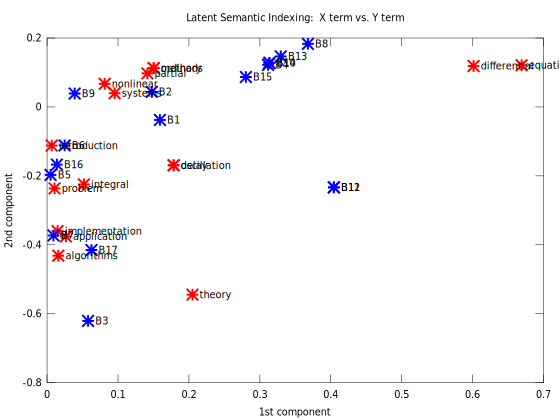

In [18]:
% X:  Keywords

nX = 16;
Xtext = {
        'algorithms',
        'application',
        'delay',
        'differential',
        'equations',
        'implementation',
        'integral',
        'introduction',
        'methods',
        'nonlinear',
        'ordinary',
        'oscillation',
        'partial',
        'problem',
        'systems',
        'theory'
        };

% Y:  Books

nY = 17;

% Book: 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17   # Keyword:
%--------------------------------------------------------------------------
coOccurrence =  [
        0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0;  % algorithms
        0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1;  % application
        0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0;  % delay
        0  0  0  1  0  0  0  1  0  1  1  1  1  1  1  0  0;  % differential
        1  1  0  1  0  0  0  1  0  1  1  1  1  1  1  0  0;  % equations
        0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0;  % implementation
        1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1;  % integral
        0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0;  % introduction
        0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0;  % methods
        0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0;  % nonlinear
        0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0;  % ordinary
        0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0;  % oscillation
        0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0;  % partial
        0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  1  0;  % problem
        0  0  0  0  0  1  0  1  1  0  0  0  0  0  0  0  0;  % systems
        0  0  1  0  0  0  0  0  0  0  1  1  0  0  0  0  1;  % theory
];

[U,S,V] = svd(coOccurrence);

%  We can look at a plot of the singular values (diagonal of S):

plot( diag(S), 'b' )

Xfactor = U(:,1:2)
Yfactor = V(:,1:2)

% plot the 2D projection of the data

text_offset = 0.01;
plot( Xfactor(:,1), Xfactor(:,2), 'r*', Yfactor(:,1), Yfactor(:,2), 'b*' )
hold on

for i = (1:nX)
     text( Xfactor(i,1)+text_offset, Xfactor(i,2), Xtext(i))
end

for i = (1:nY)
     text( Yfactor(i,1)+text_offset, Yfactor(i,2), sprintf('B%d',i))
end

title( 'Latent Semantic Indexing:  X term vs. Y term ' )
xlabel( '1st component' )
ylabel( '2nd component' )

zoom on
hold off

## The Pseudoinverse

In [19]:
A = [ 1.2 1 ;  2.7 1 ;  3.3 1 ; 3.7 1 ]

P = pinv(A)     %  the pseudoinverse of A

AP = A * P

PA = P * A      %  P is a "left inverse" for A

error = norm( A * P * A  -  A )   %  consequently  A P A  =  A

A =

   1.2000   1.0000
   2.7000   1.0000
   3.3000   1.0000
   3.7000   1.0000

P =

  -0.4227304  -0.0069300   0.1593902   0.2702703
   1.4019404   0.2688843  -0.1843382  -0.4864865

AP =

   0.8946639   0.2605683   0.0069300  -0.1621622
   0.2605683   0.2501733   0.2460152   0.2432432
   0.0069300   0.2460152   0.3416493   0.4054054
  -0.1621622   0.2432432   0.4054054   0.5135135

PA =

   1.0000e+00  -1.1102e-16
  -6.6613e-16   1.0000e+00

error =    4.9651e-16


## Computation of the Pseudoinverse -- using the SVD

If  $A = U S V'$, then it has pseudoinverse  $A^- = V ~ S^- ~ U'$, where:

$$
\begin{pmatrix}
\sigma_1 &          &        & \\
         & \sigma_2 &        & \\
         &          & \ddots & \\
         &          &        & \sigma_p \\
         &          &        & \\
         &          &        & \\
\end{pmatrix}{}^-
~~=~~
\begin{pmatrix}
\sigma_1^- &          &        &   ~    &  ~     &  \\
         & \sigma_2^- &        &   ~    &  ~     &  \\
         &               & \ddots   &        &   ~    &     \\
         &               &          & \sigma_p^- &  ~      &
\end{pmatrix}
$$
where $$
\sigma^- ~=~
\left\{
\begin{array}{ll} 1/\sigma & \sigma \neq 0 \\ 0 & \sigma = 0 \end{array}
\right.
$$

In [20]:
function P = Pseudoinverse(A)
   [U,S,V] = svd(A)
   P = V * DiagonalPinv(S) * U'
end

function Sminus = DiagonalPinv(S)
   m = size(S,1);
   n = size(S,2);
   Sminus = zeros(n,m);
   p = min(m,n);
   for i=1:p
       if S(i,i) ~= 0
           Sminus(i,i) = 1/S(i,i);
       end     
   end
end

In [21]:
function P = DiagonalPinv(S)    %  cleverer implementation
   invsigma = 1 ./ diag(S);
   invsigma(invsigma == Inf) = 0;
   P = zeros(size(S'));
   P(1:min(size(S)),1:min(size(S)))  = diag(invsigma)
end

### Properties of the Pseudoinverse

In [22]:
A = rand(4,3)

P  =  inv(A' * A) * A'
P * A
A * P
A * P * A - A
P * A * P - P
(A * P)'  -  (A * P)
(P * A)'  -  (P * A)

A =

   0.802639   0.184194   0.251411
   0.107494   0.967319   0.940896
   0.434607   0.691767   0.031022
   0.298036   0.458320   0.174913

P =

   1.201037  -0.347244   0.081537   0.127134
  -0.846949   0.101991   1.229937   0.450591
   0.719265   0.980518  -1.326872  -0.355803

ans =

   1.0000e+00   4.5797e-16  -2.7756e-17
   3.3307e-16   1.0000e+00  -1.1102e-16
  -3.8858e-16   4.9960e-16   1.0000e+00

ans =

   0.988828  -0.013413  -0.041599   0.095586
  -0.013413   0.983897  -0.049943   0.114758
  -0.041599  -0.049943   0.845104   0.355920
   0.095586   0.114758   0.355920   0.182171

ans =

  -2.2204e-16   3.3307e-16   0.0000e+00
   5.5511e-17  -1.1102e-16   1.1102e-16
   1.6653e-16  -3.3307e-16  -1.0408e-16
   1.1102e-16  -5.5511e-17  -2.7756e-17

ans =

  -6.6613e-16   1.1102e-16   5.9674e-16   1.6653e-16
   9.9920e-16  -3.0531e-16  -6.6613e-16  -2.2204e-16
  -8.8818e-16   2.2204e-16   6.6613e-16   1.6653e-16

ans =

   0.0000e+00   1.3878e-16   1.3878e-17  -6.9389e-17
  -1.3

In [23]:
essentially_equal =  @(X,Y)  max(max(abs(X-Y))) < 1e-14 * (norm(X)+norm(Y));

In [24]:
essentially_equal( (P*A)', (P*A) )
essentially_equal( (A*P)', (A*P) )
essentially_equal( (A*P*A), A )

ans =  1
ans =  1
ans =  1


In [25]:
[U,S,V] = svd(A)
essentially_equal( A, (U * S * V') )

U =

  -0.35255  -0.73359   0.57130  -0.10570
  -0.76355   0.58107   0.25149  -0.12690
  -0.42587  -0.32158  -0.74855  -0.39357
  -0.33368  -0.14415  -0.22371   0.90434

S =

Diagonal Matrix

   1.66106         0         0
         0   0.79306         0
         0         0   0.42863
         0         0         0

V =

  -0.39106  -0.89409   0.21832
  -0.75317   0.17456  -0.63424
  -0.52896   0.41246   0.74167

ans =  1


In [26]:
diag(S)
S_inv = S'; for i=1:min(size(S_inv)), if S(i,i) ~= 0, S_inv(i,i) = 1/S(i,i); end, end
S_inv
V * S_inv * U'

ans =

   1.66106
   0.79306
   0.42863

S_inv =

Diagonal Matrix

   0.60203         0         0         0
         0   1.26094         0         0
         0         0   2.33301         0

ans =

   1.201037  -0.347244   0.081537   0.127134
  -0.846949   0.101991   1.229937   0.450591
   0.719265   0.980518  -1.326872  -0.355803



In [27]:
essentially_equal( P,  V * S_inv * U' )
S * S_inv
S_inv * S

ans =  1
ans =

Diagonal Matrix

   1.00000         0         0         0
         0   1.00000         0         0
         0         0   1.00000         0
         0         0         0   0.00000

ans =

Diagonal Matrix

   1.00000         0         0
         0   1.00000         0
         0         0   1.00000



In [28]:
pseudoinverse  =  @(X)  inv(X' * X) * X'
P = pseudoinverse(A)
b = rand(4,1)
P * b
A \ b

pseudoinverse =

@(X) inv (X' * X) * X'

P =

   1.201037  -0.347244   0.081537   0.127134
  -0.846949   0.101991   1.229937   0.450591
   0.719265   0.980518  -1.326872  -0.355803

b =

   0.082549
   0.530480
   0.771848
   0.976135

ans =

   0.10197
   1.37335
  -0.79194

ans =

   0.10197
   1.37335
  -0.79194



## Implementing the SVD

In [29]:
A = rand(3,3)

A =

   0.87964   0.20403   0.18991
   0.63167   0.63171   0.97220
   0.68590   0.21807   0.20663



In [30]:
function [U,S,V] = SimpleSVD(A)
           [Q L] = eig(A' * A);
           V = Q;
           S = sqrt(L);
           U = A * V * pinv(S);
end           

In [31]:
A = rand(3,3)

[U,S,V] = svd(A)

[U,S,V] = SimpleSVD(A)

A =

   0.26929   0.92373   0.73514
   0.56917   0.18885   0.26814
   0.58816   0.43689   0.85086

U =

  -0.68710   0.66803  -0.28571
  -0.32429  -0.63386  -0.70218
  -0.65018  -0.38981   0.65216

S =

Diagonal Matrix

   1.68451         0         0
         0   0.52470         0
         0         0   0.21360

V =

  -0.446431  -0.781691  -0.435498
  -0.581768   0.623341  -0.522486
  -0.679887  -0.020105   0.733042

U =

   0.28571  -0.66803   0.68710
   0.70218   0.63386   0.32429
  -0.65216   0.38981   0.65018

S =

Diagonal Matrix

   0.21360         0         0
         0   0.52470         0
         0         0   1.68451

V =

   0.435498   0.781691   0.446431
   0.522486  -0.623341   0.581768
  -0.733042   0.020105   0.679887



In [32]:
function [U,S,V] = GeneralSquareSVD(A)
       %  This simple approach is sufficient to implement the SVD when A is square.
       %  (It also works like  svd(A,'econ')  when A has more rows than columns.)
   [Q L] = eig(A' * A);  %%% Jacobi(A' * A);
   V = Q;
   S = sqrt(abs(L));
       %  Although L should not have any negative eigenvalues,
       %  roundoff errors may produce some, so abs(L) avoids problems.

%  Next:  compute U  (from A, S, and V).
   Spinv = 1 ./ S;
   Spinv( Spinv == Inf ) = 0;
       %  Spinv = pseudoinverse of S;  we replace all  1/0 = Inf  values by 0.
   U = A * V * Spinv;

%  Finally:  sort the singular values in descending order.
   singular_values = diag(S);
   [sorted_singular_values ordering] = sort(singular_values,1,'descend');
   U = U(:,ordering);
   S = S(ordering,ordering);
   V = V(:,ordering);
end

In [33]:
[U,S,V] = GeneralSquareSVD(A)

U =

   0.68710  -0.66803   0.28571
   0.32429   0.63386   0.70218
   0.65018   0.38981  -0.65216

S =

   1.68451   0.00000   0.00000
   0.00000   0.52470   0.00000
   0.00000   0.00000   0.21360

V =

   0.446431   0.781691   0.435498
   0.581768  -0.623341   0.522486
   0.679887   0.020105  -0.733042



In [34]:
[U,S,V] = svd(A)

U =

  -0.68710   0.66803  -0.28571
  -0.32429  -0.63386  -0.70218
  -0.65018  -0.38981   0.65216

S =

Diagonal Matrix

   1.68451         0         0
         0   0.52470         0
         0         0   0.21360

V =

  -0.446431  -0.781691  -0.435498
  -0.581768   0.623341  -0.522486
  -0.679887  -0.020105   0.733042



## General non-square SVD

In [35]:
function [U,S,V] = SimpleSVD(A)
   [n p] = size(A);
   if (n < p)
      [Q L] = eig(A' * A);  %%% Jacobi(A' * A);  %  (A' * A)  is a  p x p  matrix
      V = Q;
      S = zeros([n p]);
      S(1:n, 1:n) = sqrt(abs(L(1:n,1:n)));
      Sinv = 1 ./ S';
      Sinv(Sinv == Inf) = 0;
      U = A * V * Sinv;
   else
      [Q L] = eig(A' * A);  %%% Jacobi(A * A');  %  (A * A')  is a  n x n  matrix
      U = Q;
      S = zeros([n p]);
      S(1:p, 1:p) = sqrt(abs(L(1:p,1:p)));
      Sinv = 1 ./ S';
      Sinv(Sinv == Inf) = 0;
      V = (Sinv * U' * A)';
   end
   singular_values = diag(S);
end

## Cleverer SVD implementation

In [36]:
function [U,S,V] = ClevererSVD(A)
   [n p] = size(A);
   if (n > p)
      [Q L] = eig(A' * A);  %%% Jacobi(A' * A);  %  (A' * A)  is a  p x p  matrix
      V = Q;
      S = sqrt(abs(L));
      Sinv = 1 ./ S';
      Sinv(Sinv == Inf) = 0;
      U = A * V * Sinv;        %  yield a rectangular matrix U
   else
      [Q L] = eig(A' * A);  %%% Jacobi(A * A');  %  (A * A')  is a  n x n  matrix
      U = Q;
      S = sqrt(abs(L));
      Sinv = 1 ./ S';
      Sinv(Sinv == Inf) = 0;
      V = (Sinv * U' * A)';    %  yield a rectangular matrix V
   end
   singular_values = diag(S);  %  put the singular values in decreasing order
   [sorted_singular_values ordering] = sort(singular_values,1,'descend');
   U = U(:,ordering);
   S = S(ordering,ordering);
   V = V(:,ordering);
end

In [37]:
[U,S,V] = svd(A)
[U,S,V] = ClevererSVD(A)

U =

  -0.68710   0.66803  -0.28571
  -0.32429  -0.63386  -0.70218
  -0.65018  -0.38981   0.65216

S =

Diagonal Matrix

   1.68451         0         0
         0   0.52470         0
         0         0   0.21360

V =

  -0.446431  -0.781691  -0.435498
  -0.581768   0.623341  -0.522486
  -0.679887  -0.020105   0.733042

U =

   0.446431   0.781691   0.435498
   0.581768  -0.623341   0.522486
   0.679887   0.020105  -0.733042

S =

   1.68451   0.00000   0.00000
   0.00000   0.52470   0.00000
   0.00000   0.00000   0.21360

V =

   0.505328  -0.252445  -0.077182
   0.486363   1.168547   0.845944
   0.630848   0.809248  -0.765284

